##### Information Theory (Fall 2023/4)

# Final Assignment

#### Due: 16/3/2024 by the end of the day. 

#### Instructions:
- Write your ID, and date in the cell below (do not write your name). Recall that this assignment is **individual** (collaboration is not allowed).
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding exercises.
- **Solutions to the coding part must be compilable** and without dependencies except standard Python packages.
- Make sure to include notes explaining your code.
- Make sure to label figure axes and include a title.
- You may reuse code from your home assignments.
- Write your solution in the notebook using $\LaTeX$ (recommended) or submit additional scanned notes for theoretic exercises.
- Make sure to justify your steps.
- You may use results from class or previous home assignments. In this case, you must clearly describe each result and where it was given.
- Be concise. We are likely to deduct points for redundant explanations and derivations.
<hr>
<hr>

**Date**: 

**ID**:

## Problem 1: Channel Capacity
1. Calculate the capacity of the following channels with $\mathcal X = \mathcal Y$:
$$
(1) \qquad p(y|x) = \begin{bmatrix} 1/3 & 1/3 & 1/3 \\
1/3 & 1/3 & 1/3 \\
1/3 & 1/3 & 1/3 
\end{bmatrix}
$$
$$
(2) \qquad p(y|x) = \begin{bmatrix} 1/2 & 1/2 & 0 \\
0 & 1/2 & 1/2 \\
1/2 & 0 & 1/2 
\end{bmatrix}
$$
2. Answer and provide a short explanation or example.
 - Is it possible to increase the capacity by adding a row to the channel matrix?
 - Is it possible to decrease the capacity by adding a row to the channel matrix?
3. We wish to encode a $\mathrm{Bernuolli}(\alpha)$, $\alpha \in (0,1)$ process $V_1,V_2,\ldots$ over a binary symmetric channel with crossover probability $p \in [0,1]$. Find conditions on $\alpha$ and $p$ so that $\Pr[\hat{V}^n \neq V^n]$ can be made to go to zero as $n \to \infty$. Justify your claim. 

## Problem 2: Markov Chain and Data Compression

Consider a Markov Chain with transition probability matrix $Q$ whose rows are proportional to
$$
Q' = \begin{bmatrix}
9 & 1 & 1  & & & & & & & & & & &\\
1 & 9 & 1 & & & & & & & & & & &\\  
1 & 1 & 8 & 1 & 2 & & & & & & &\\ 
  &   & 1 & 8 & 1 & & & & & & &\\
  &   & 1 & 1 & 7 & 1 & 2 & & &\\
  &   &   &   & 1 & 7 & 1 & & & & &\\
  &   &   &   & 1 & 1 & 6 & 1 & 2 &\\
  &   &   &   &   &   & 1 & 6 & 1 &  & &\\
  &   &   &   &   &   & 1 & 1 & 5 & 1 & 2 &\\
  &   &   &   &   &   &   &   & 1 & 5 & 1 &\\
  &   &   &   &   &   &   &   & 1 & 1 & 4 & 1 & 2 \\
  &   &   &   &   &   &   &   &   &   & 1 & 4 & 1\\
  &   &   &   &   &   &   &   &   &   & 1 & 1 & 3 \\
\end{bmatrix}
$$
For simplicity, we will denote the states by the first 13 English letters, i.e. $\mathcal X = \{a,b,...,m\}$. For example, the probability of transitioning from 'a' to 'a' is $9/11$ and the probability of transitioning from 'c' to 'b' is $1/13$. The function `uild_Q` below returns such $Q$. 

1. Is the Markov chain ergodic? Explain. 
2. What is the stationary distribution? (write a code that evaluate this distribution and plot it; make sure to label the states correctly with letters). 
3. What is the entropy rate? (write a code to evaluate and print it)
4. Write a program that samples from the chain a sequence of length $n$ given the initial state $x="a"$. Print the result for $n=100$. Use the ``numpy.random`` as your random number generation interface and set your seed as you ID number.
5. Use a Huffman code to encode a sample from the chain:
  - (1) Sample a sequence of length $n=10,000$. Find the empirical distribution of times spent at each state and plot this distribution.
  - (2) Use the empirical frequencies to generate the Huffman code. Namely, here the probabilities of the symbols are the observed frequencies in the sample as opposed to the version presented in class in which the probabilities are taken from the generative model. Recall that you may reuse code from a previous assignment to implement Huffman coding. 
  - (3) Compress the sequence using the Huffman code and decompress it back to verify correctness. Use the function prototype below for the compression and decompression operation. 
  - (4) Report on the resulting average number of bits per symbol. Do not include the length of the code in this evaluation. Use the function `check_compression` for this step. This function is provided below along with an example use case using a dummy compressor and decompressor. 
  - (5) If you repeat 5.1 - 5.4 while gradually increasing $n$, what is the limiting number of average bits per symbol?
6. We will now study a different compression procedure for the Markov chain. The move-to-front (M2F) transform of a sequence replaces every symbol with its index in the stack of recently used (RL) symbols. For example, with an initial list of 'abcdefg', the sequence 'abaafcaga' is transformed to '011053261'. Explanation:

| i | RL list | i-th letter | output
| :- | -: | -: | -: |
| 1 | abcdefg | a | 0 |
| 2 | abcdefg | b | 1 |
| 3 | bacdefg | a | 1 |
| 4 | abcdefg | a | 0 |
| 5 | abcdefg | f | 5 | 
| 6 | fabcdeg | c | 3 |
| 7 | cfabdeg | a | 2 |
| 8 | acfbdeg | g | 6 | 
| 9 | gacfbde | a | 1 |

- (1) Write a function that implement this transformation by completing the provided prototype. Make sure that the complexity is linear in the sequence length. 
- (2) Argue that this transformation is invertible. Write a function to invert it by completing the provided prototype. 
- (3) Apply this transformation to the sample from the Markov chain you used in 5. Plot the histogram of the sequence of *integers* obtained after the transformation.
- (4) Outline a procedure for compressing the Markov chain using the M2F transform and Huffman coding.
- (5) Intuitively explain why your compression procedure is better than Huffman coding.
- (6) Implement the compressor and decompressor by completing the provided prototypes. 
- (7) Compress the sample you used in 5 using this procedure and report on the average number of bits per symbol using the function `check_compression`. 
- (8) Did the compression ratio improve compared to vanilla Huffman coding? What is the gap from the optimal asymptotic compression ratio? 

In [1]:
"""
This cell contains a functions the function `build_Q` that returns the stochstic matrix coresponding to Q in the description above. 

Additonal functions that may be useful are also included.
The function `letters_to_integers` converts a string to a list of integers based on a dictionary.
The function `integers_to_letters` converts a list of integers to a string based on a dictionary.
The function `integers_to_binary` converts a list of integers (0:(2^k-1)) to a binary string of length k * len(lo_integers).
The function `binary_to_integers` converts a binary string of length k * len(s) to a list of integers.
The function `entropy` calculates the entropy of a discrete distribution.

"""
import numpy as np
from matplotlib import pyplot as plt


YOUR_ID_NUMBER = 42 # modify this to your ID number
np.random.seed(YOUR_ID_NUMBER)

def build_Q():
    """
    Returns:
    Q: a 13x13 numpy array representing the transition matrix for the Markov chain.
    """
    
    Q1 = np.array([[1, 1, 2], [1, 1, 1], [1, 1, 1]])
    Q = np.zeros((13, 13))
    Q[:3, :3] = Q1
    Q[2:5, 2:5] = Q1
    Q[4:7, 4:7] = Q1
    Q[6:9, 6:9] = Q1
    Q[8:11, 8:11] = Q1
    Q[10:13, 10:13] = Q1
    Q[0, 0] = Q[1,1] = 9
    Q[2, 2] = Q[3,3] = 8
    Q[4, 4] = Q[5,5] = 7
    Q[6, 6] = Q[7,7] = 6
    Q[8, 8] = Q[9,9] = 5
    Q[10, 10] = Q[11,11] = 4
    Q[12, 12] = 3
    Q[0, 2] = 1
    Q[10, 12] = 1
    return Q / Q.sum(axis=1, keepdims=True)

Xcal = list('abcdefghijklm')


def letters_to_integers(s, dictionary):
    """
    Convert a string to a list of integers based on a dictionary.
    """
    return [dictionary.index(c) for c in s]

def integers_to_letters(lo_integers, dictionary):
    """
    Convert a list of integers to a string based on a dictionary.
    """
    return [dictionary[i] for i in lo_integers]

def integers_to_binary(lo_integers, k=4):
    """
    Convert a list of integers (0:(2^k-1)) to a binary string of length k * len(lo_integers).
    """
    return "".join([np.binary_repr(i, width=k) for i in lo_integers])

def binary_to_integers(s, k=4):
    """
    Convert a binary string of length k * len(s) to a list of integers.
    """
    return [int(s[i:i+k], 2) for i in range(0, len(s), k)]


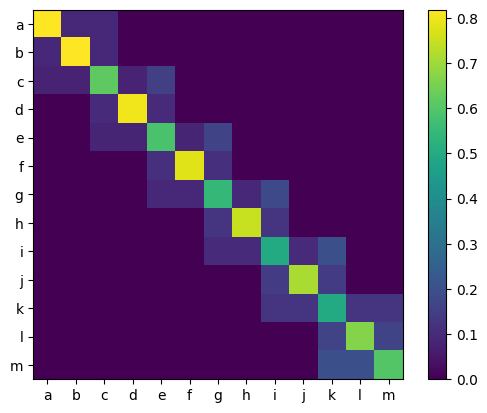

In [2]:
# get and plot the transition matrix:
Q = build_Q()
plt.imshow(Q)

# set the xticks and yticks to be the letters
plt.xticks(range(13), integers_to_letters(range(13), Xcal))
plt.yticks(range(13), integers_to_letters(range(13), Xcal))
plt.colorbar()
plt.show()

In [3]:
def check_compression(data, compressor, decompressor):
    """
    Check that the compressor and decompressor work correctly and report the size of the compression and the 
    compression ratio. 

    Args:
    data: a 1D numpy array of letters from the alphabet 'abcdefghijklm'.
    compressor: a function that takes in data and returns a tuple of compressed data and a code. 
                The compressed data must be a 1D numpy array of bits (0s and 1s). 
    decompressor: a function that takes in compressed data and a code and returns the decompressed data.
    """

    # compress the data
    compressed_data, code = compressor(data)
    # decompress the data
    decompressed_data = decompressor(compressed_data, code)
    # check that the decompressed data matches the original data

    assert decompressed_data == data, f"Decompressed data does not match original data."

    # Reporot size of compression:
    print(f"Original data size in bits: {len(data) * np.ceil(np.log2(len(Xcal)))}")
    print(f"Compressed data size in bits: {len(compressed_data)}")
    print(f"Compressed data size in bits per symbol: {len(compressed_data) / len(data):.2f}")
    print(f"Compression ratio: {len(compressed_data) / (len(data) * np.log2(len(Xcal))):.2f}")


In [4]:
# Example of how to use the check_compression function:
def dummy_compressor(data):
    """
    This function takes in a 1D numpy array of letters from the alphabet 'abcdefghijklm' and returns a representation of every letter
    using 4 bits accoding to the lexicographical order of the letters. (a -> 0000, b -> 0001, ..., m -> 1100)
    """
    data_in_integers = letters_to_integers(data, Xcal)
    data_in_bits = integers_to_binary(data_in_integers, k=4)
    return data_in_bits, None

def dummy_decompressor(compressed_data, code):
    """
    This function inverses the simple_compressor function.
    """
    compressed_data_in_integers = binary_to_integers(compressed_data, k=4)
    return "".join(integers_to_letters(compressed_data_in_integers, Xcal))

s = "".join(np.random.choice(Xcal, size=100))
check_compression(s, dummy_compressor, dummy_decompressor)


Original data size in bits: 400.0
Compressed data size in bits: 400
Compressed data size in bits per symbol: 4.00
Compression ratio: 1.08


In [5]:
def Huffman_compressor(data):
    """
    This function takes in a 1D numpy array of letters from the alphabet 'abcdefghijklm' and returns a representation of every letter
    using Huffman coding.
    """

    # YOUR CODE HERE


def Huffman_decompressor(compressed_data, code):
    """
    This function inverses the Huffman_compressor function.
    """

    # YOUR CODE HERE



In [6]:
def move_to_front_transform(input, max_int = 13):
    """
    Move-to-front transform of a list of integers. The list of integers is assumed to consist of the integers 0, 1, ..., 12 in some order.

    Args:
    input: a list of integers
    max_int: the maximum integer in the list
    """

    # YOUR CODE HERE
    
    
def inverse_move_to_front_transform(input, max_int = 13):
    """
    Inverse move-to-front transform of a list of integers. The list of integers is assumed to consist of the integers 0, 1, ..., 12 in some order.

    Args:
    input: a list of integers
    max_int: the maximum integer in the list

    """
   
    # YOUR CODE HERE
    

In [7]:
def compress_M2F_Huffman(data):
    """
    Compress a string using the move-to-front and Huffman coding algorithms.

    Args:
    data: a string from the alphabet Xcal
    Xcal: a list of characters

    Returns:
    encoded_data: a string of bits
    huffman_code: a dictionary mapping integerts to their Huffman codes or a Huffman tree
    """

        # YOUR CODE HERE


def decompress_M2F_Huffman(encoded_data, huffman_code):
    """
    Decompress a string using the move-to-front and Huffman coding algorithms.

    Args:
    encoded_data: a string of bits
    huffman_code: a dictionary mapping integerts to their Huffman codes or a Huffman tree
    Xcal: a list of characters representing the original alphabet

    Returns:
    decoded_data: a string from the alphabet Xcal
    """

        # YOUR CODE HERE


## Problem 3: Joint Typicality and Channel Coding
(Based on problem 7.15 in Thomas \& Cover)

Consider a binary symmetric channel (BSC) with bit-flip probability $p=0.1$. Namely,
$$
P_{Y|X} = \begin{bmatrix} 0.9 & 0.1 \\
0.1 & 0.9 
\end{bmatrix}
$$
1. What is the input distribution $P_X^*$ that achieves the capacity?
2. Write the joint distribution $P_{X,Y}$ (as a $2 \times 2$ matrix) when $P_X = P_X^*$ is the distribution in (1).
3. Find $H(X)$, $X(Y)$, $H(X,Y)$, and $I(X,Y)$ when $P_X = P_X^*$.
4. Henceforth, assume that $X_1,X_2,\ldots,X_n$ be drawn IID according to $\mathrm{Bernoulli}(1/2)$ distribution. Of the $2^n$ possible input sequence of length $n$, which of them are typical (i.e., members of $A_{\epsilon}^{(n)}(X)$)? Which $Y$ sequences are typical? 
5. Let $Z^n$ the sequence indicating bit-flips, so that we have $Y^n = X^n \oplus Z^n$ and $Z^n$ is independent of $X^n$. Argue that
$$
 p(x^n,y^n) = p(x^n)p(z^n) = \left(\frac{1}{2} \right)^n (1 - p)^{n -k} p^k,
$$
where $k$ is the number of bit-flips (non-zeros of $z^n$).

6. Recall the jointly typical set $A_{\epsilon}^{(n)}(X,Y)$ defined in class. Based on (5), show that the condition $(x^n,y^n) \in A_{\epsilon}^{(n)}(X,Y)$ if and only if $z^n \in A_{\epsilon}^{(n)}(Z)$.  
7. Write a program that checks if a sequence is in the set $A_{\epsilon}^{(n)}(Z)$ (you may reuse code from previous assignments). What is the size of $A_{\epsilon}^{(n)}(Z)$ for $\epsilon=0.2$ and $n=25$?
8. Now consider random coding for the channel $P_{Y|X}$ as in the proof of the achievability of the channel coding theorem. Assume that a codebook is generated by drawing $2^{nR}$ length-$n$ codewords independently from $\mathrm{Bernoulli}(1/2)$. In order to send a message $w \in \{1,\ldots,2^{nR}\}$, send the $w$-th row in the codebook over the channel. The receiver looks at the received sequence and tries to find a codeword $\hat{w}$ that is mapped to some $x^n(\hat{w})$ that is jointly typical with $y^n$.
 - Implement the decoder in `decode_message` for an arbitrary codeword and $\epsilon$ (see code prototype below). 
 - Set your seed to your ID number. For $R=0.1, 0.2, 0.3$, $n=50$, and $\epsilon=0.2$, generate a random codebook using the function ``build_random_codebook`` (once for every $n$ and $R$). Send a total of $N = 100$ independent messages through the channel. Report on the following quantities for every $R$:
    - Number of error events of the kind: 'no jointly typical pair was found'
    - Number of error events of the kind: '$w\neq \hat{w}$ because more than one jointly typical pair was found'
    - Average number of events over the $N$ messages (this is an estimate to the average probability of error)

    You can achieve this part using the function `check_transmission`, once you complete the code in the indicated places.


In [9]:
YOUR_ID_NUMBER = 42 # modify this to your ID number
np.random.seed(YOUR_ID_NUMBER)

def send_through_channel(x, p):
    """
    Simulate a binary symmetric channel with crossover probability p
    """
    z = np.random.rand() < p
    return x ^ z # XOR

def sample_message(n, R):
    """
    Draw a random message out of ceil(2^(nR)) possible messages
    """
    return np.random.randint(np.ceil(2**(R*n)))

def build_random_codebook(n, R):
    """
    Generate a random codebook of 2^(nR) codewords
    """
    return np.random.randint(2, size=(int(np.ceil(2**(R*n))), n))

def encode_message(W, codebook):
    """
    Encode a message W using a codebook
    """
    return codebook[W]

def decode_message(y, codebook, epsilon, p):
    """
    Decode a received message y using the codebook using joint typicality
    In this version, if we find more than one typical codeword we return 
    the index of the first one. We return None if no typical codeword is found.

    Args:
    y: received message
    codebook: the codebook (2D array of size 2^(nR) x n)
    epsilon: joint typicality threshold
    p: channel crossover probability
    """

    # YOUR_CODE_HERE


    # return none if no typical codeword was found
    return None

def simulate_transmission(w, codebook, epsilon, p, verbose=False):
    """
    Simulate the transmission of a message through the channel

    w: message index
    codebook: the codebook (2D array of size 2^(nR) x n)
    epsilon: joint typicality threshold
    p: channel crossover probability

    Returns the decoded message
    """
    x = encode_message(w, codebook)
    y = np.zeros_like(x)
    n = len(x)
    for i in range(n):  # sending n transmissions through the channel
        y[i] = send_through_channel(x[i], p)
    w_hat = decode_message(y, codebook, epsilon)

    if verbose:
        print("Message: ", w)
        print("Encoded message:  ", x)
        print("Received message: ", y)
        print("Decoded message: ", w_hat)
    return w_hat

def check_transmission(N, n, R, epsilon, p):
    """
    Check the transmission of N random messages through the channel.

    N: number of messages to simulate
    n: number of channel uses
    R: code rate
    p: channel crossover probability
    epsilon: joint typicality threshold

    Returns a dictionary with the number of non-typical errors,
    the number of errors resulting from more than one typical errors (when w != w_hat) 
    but not because of a non-typical error. 
    """

    codebook = build_random_codebook(n, R)  # generate a random codebook
    
    num_of_non_typical_error = 0      # update this number in the loop
    num_of_more_other_error = 0       # update this number in the loop

    for _ in range(N):
        w = sample_message(n, R)
        w_hat = simulate_transmission(w, codebook, epsilon, p)

        # YOUR_CODE_HERE
        
    return dict(num_of_non_typical_errors=num_of_non_typical_error,
            num_of_more_other_decoding_errors=num_of_more_other_error)
